In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
# Read in the data
data_path = '../../preprocessing/data'
obs_A = pd.read_parquet(f'{data_path}/obs_A.parquet')
est_A = pd.read_parquet(f'{data_path}/est_A.parquet')
obs_B = pd.read_parquet(f'{data_path}/obs_B.parquet')
est_B = pd.read_parquet(f'{data_path}/est_B.parquet')
obs_C = pd.read_parquet(f'{data_path}/obs_C.parquet')
est_C = pd.read_parquet(f'{data_path}/est_C.parquet')

test_A = pd.read_parquet(f'{data_path}/test_A.parquet').dropna()
test_B = pd.read_parquet(f'{data_path}/test_B.parquet').dropna()
test_C = pd.read_parquet(f'{data_path}/test_C.parquet').dropna()

# Concatenate
A = pd.concat([obs_A, est_A])
B = pd.concat([obs_B, est_B])
C = pd.concat([obs_C, est_C])

In [123]:
# Read in the data
data_path = '../../preprocessing/data'
obs_A = pd.read_parquet(f'{data_path}/obs_A.parquet')
est_A = pd.read_parquet(f'{data_path}/est_A.parquet')
obs_B = pd.read_parquet(f'{data_path}/obs_B.parquet')
est_B = pd.read_parquet(f'{data_path}/est_B.parquet')
obs_C = pd.read_parquet(f'{data_path}/obs_C.parquet')
est_C = pd.read_parquet(f'{data_path}/est_C.parquet')

test_A = pd.read_parquet(f'{data_path}/test_A.parquet').dropna()
test_B = pd.read_parquet(f'{data_path}/test_B.parquet').dropna()
test_C = pd.read_parquet(f'{data_path}/test_C.parquet').dropna()

# Concatenate
A_filled = pd.concat([obs_A, est_A])
B_filled = pd.concat([obs_B, est_B])
C_filled = pd.concat([obs_C, est_C])

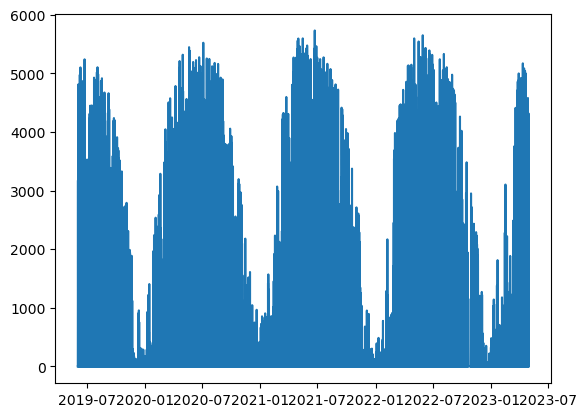

In [93]:
plt.plot(A['date_forecast'], A['pv_measurement'], label='A')

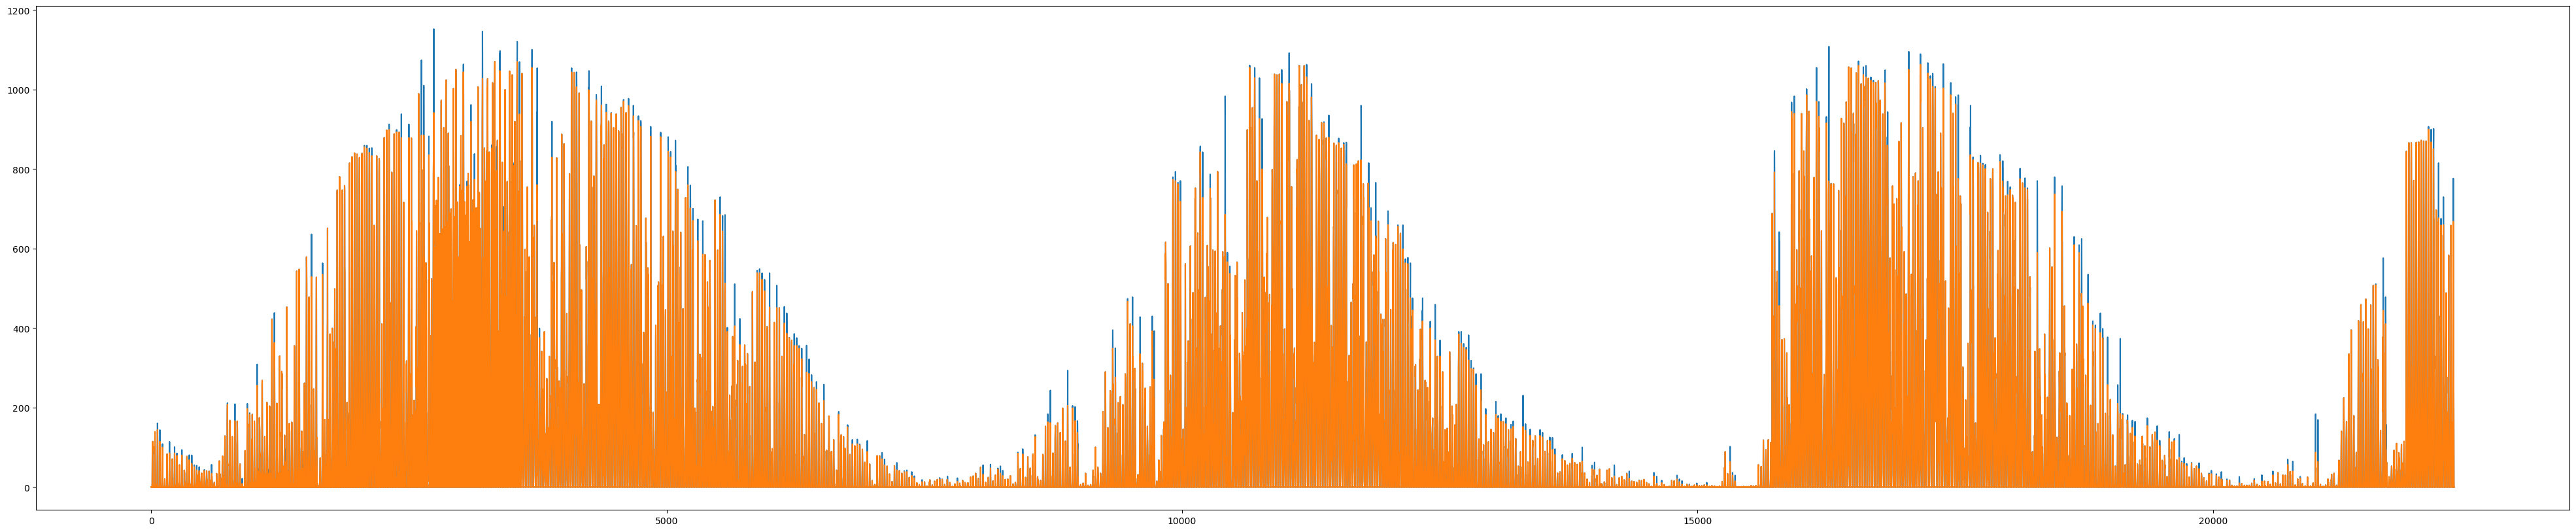

In [124]:
plt.figure(figsize=(50, 10))
plt.plot(B['pv_measurement'], label='B')
plt.plot(B_filled['pv_measurement'], label='B_filled')


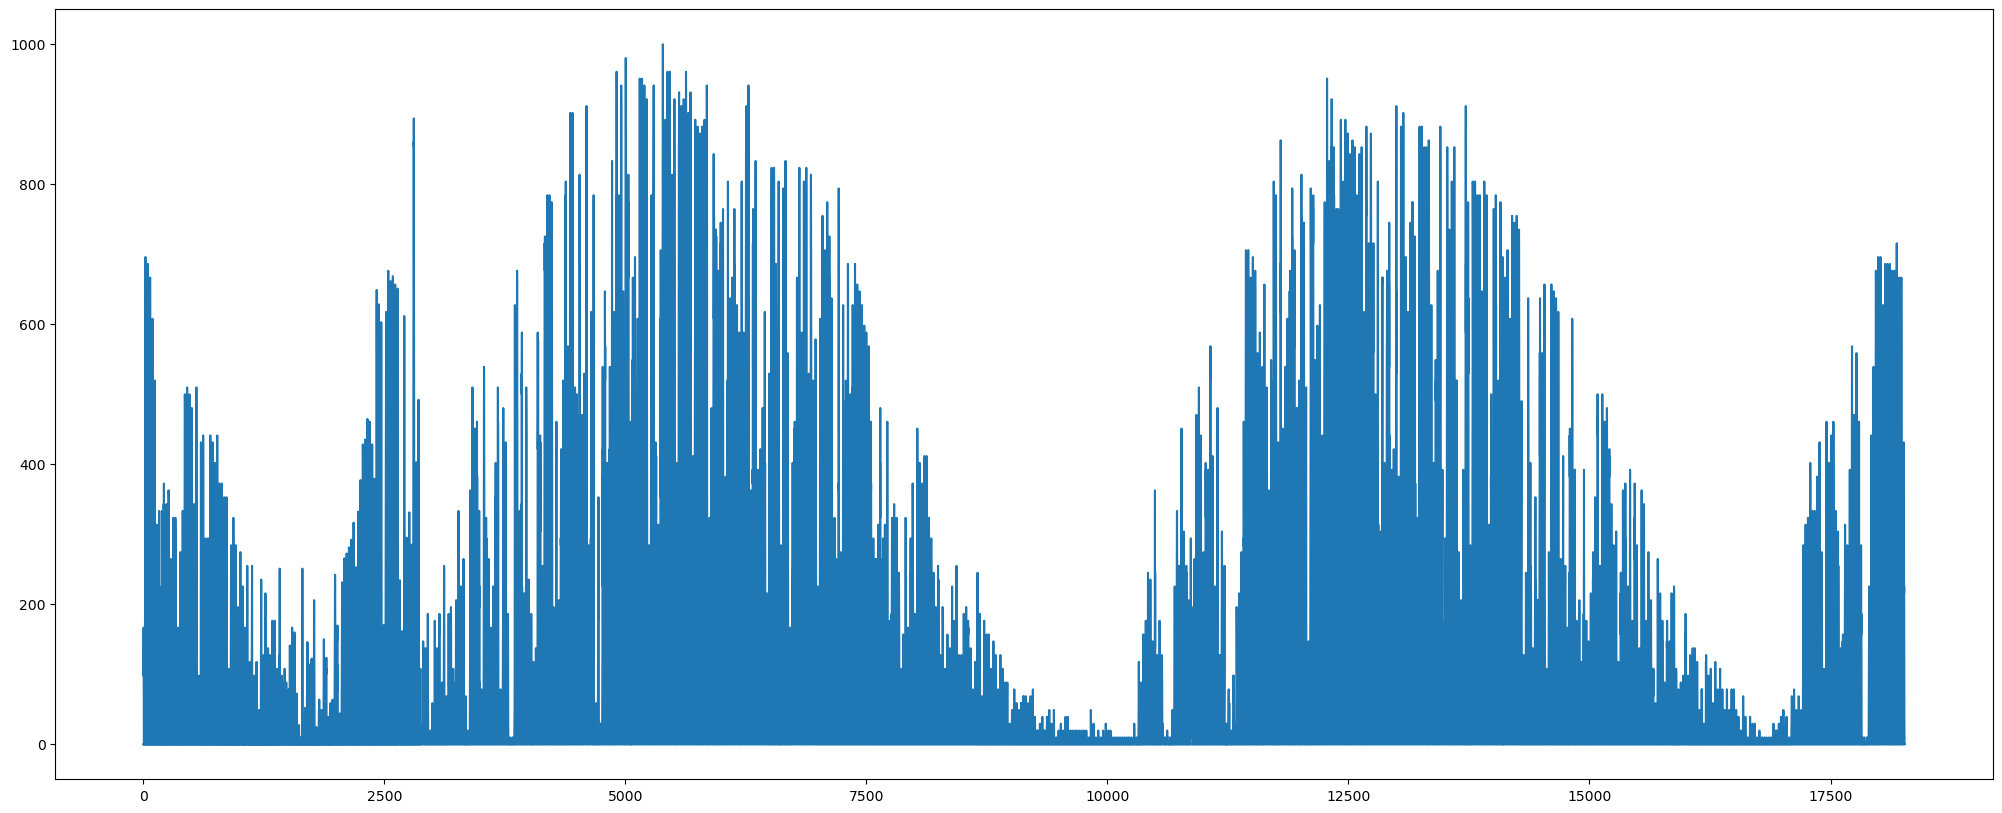

In [95]:
plt.figure(figsize=(25, 10))
plt.plot(C['pv_measurement'], label='B')

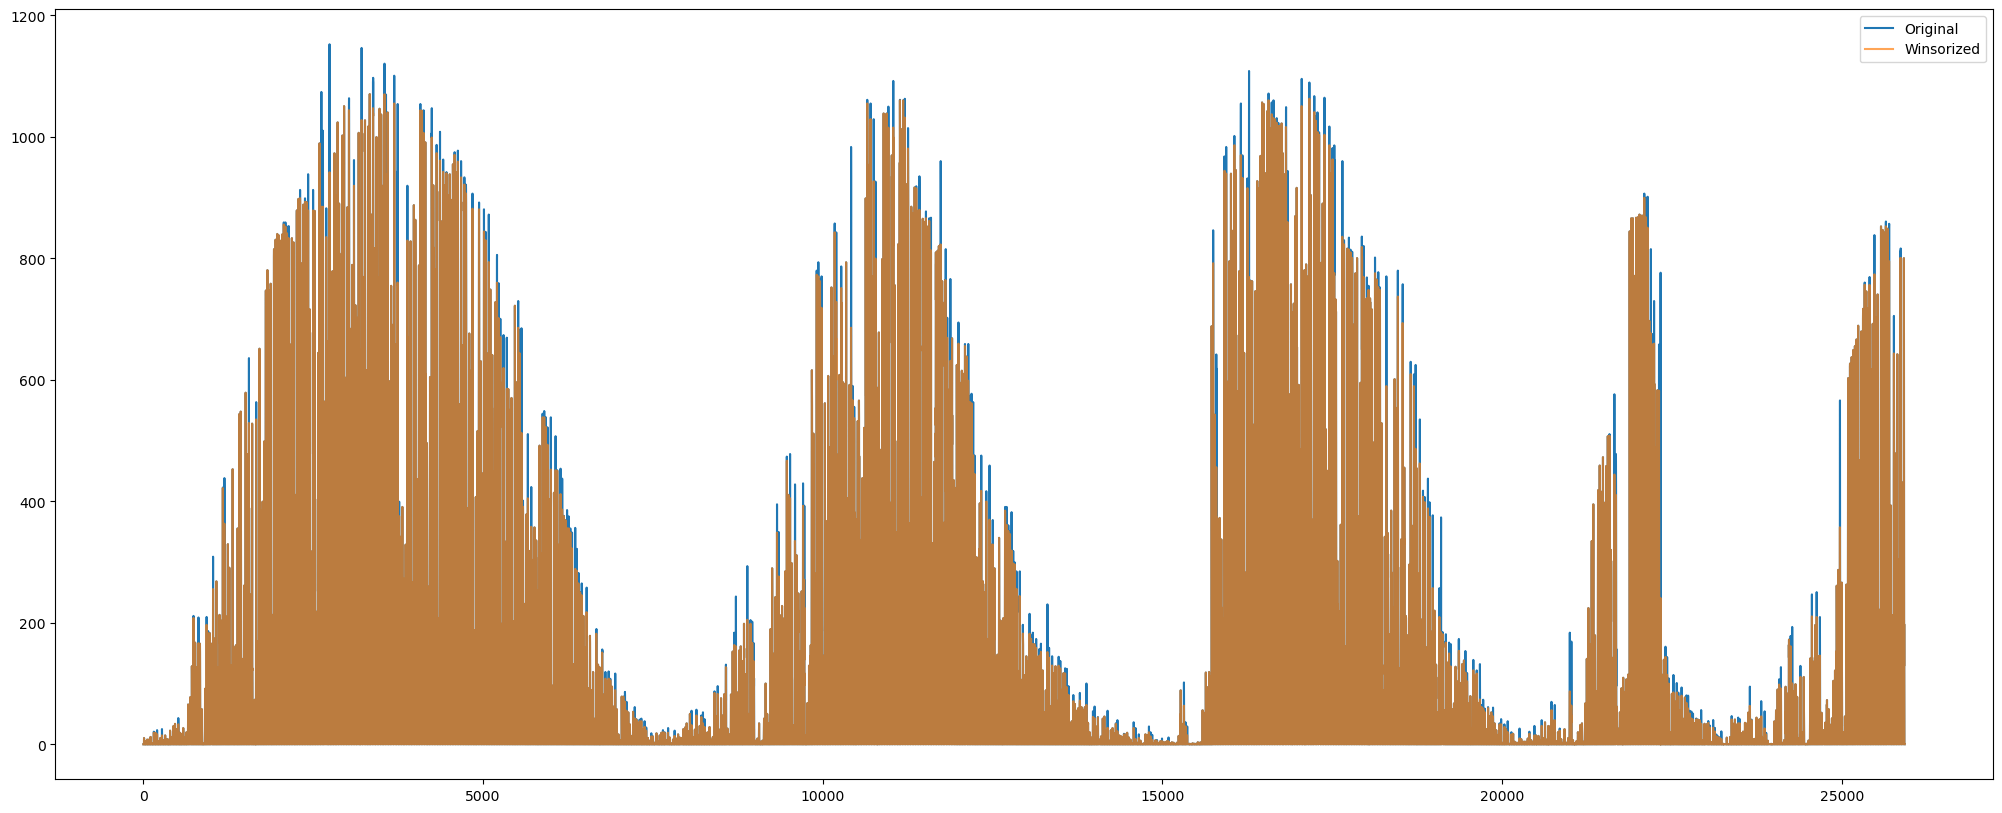

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

window_size = 100
# Ensure DataFrame 'B' has a simple integer index
B = B.reset_index(drop=True)

# Define a function to apply local Winsorizing
def local_winsorize(window):
    lower_bound = window.quantile(0.05)
    upper_bound = window.quantile(0.98)
    return window.clip(lower=lower_bound, upper=upper_bound)

# Create a new column for winsorized measurements
B['winsorized_measurement'] = B['pv_measurement']

# Apply the function over a rolling window and update the values in the new column
for start in range(len(B)):
    end = start + window_size
    if end > len(B):
        break
    B.iloc[start:end, B.columns.get_loc('winsorized_measurement')] = local_winsorize(B['pv_measurement'].iloc[start:end]).values

# Plot the results
plt.figure(figsize=(25, 10))
plt.plot(B['pv_measurement'], label='Original')
plt.plot(B['winsorized_measurement'], label='Winsorized', alpha=0.7)
plt.legend()
plt.show()


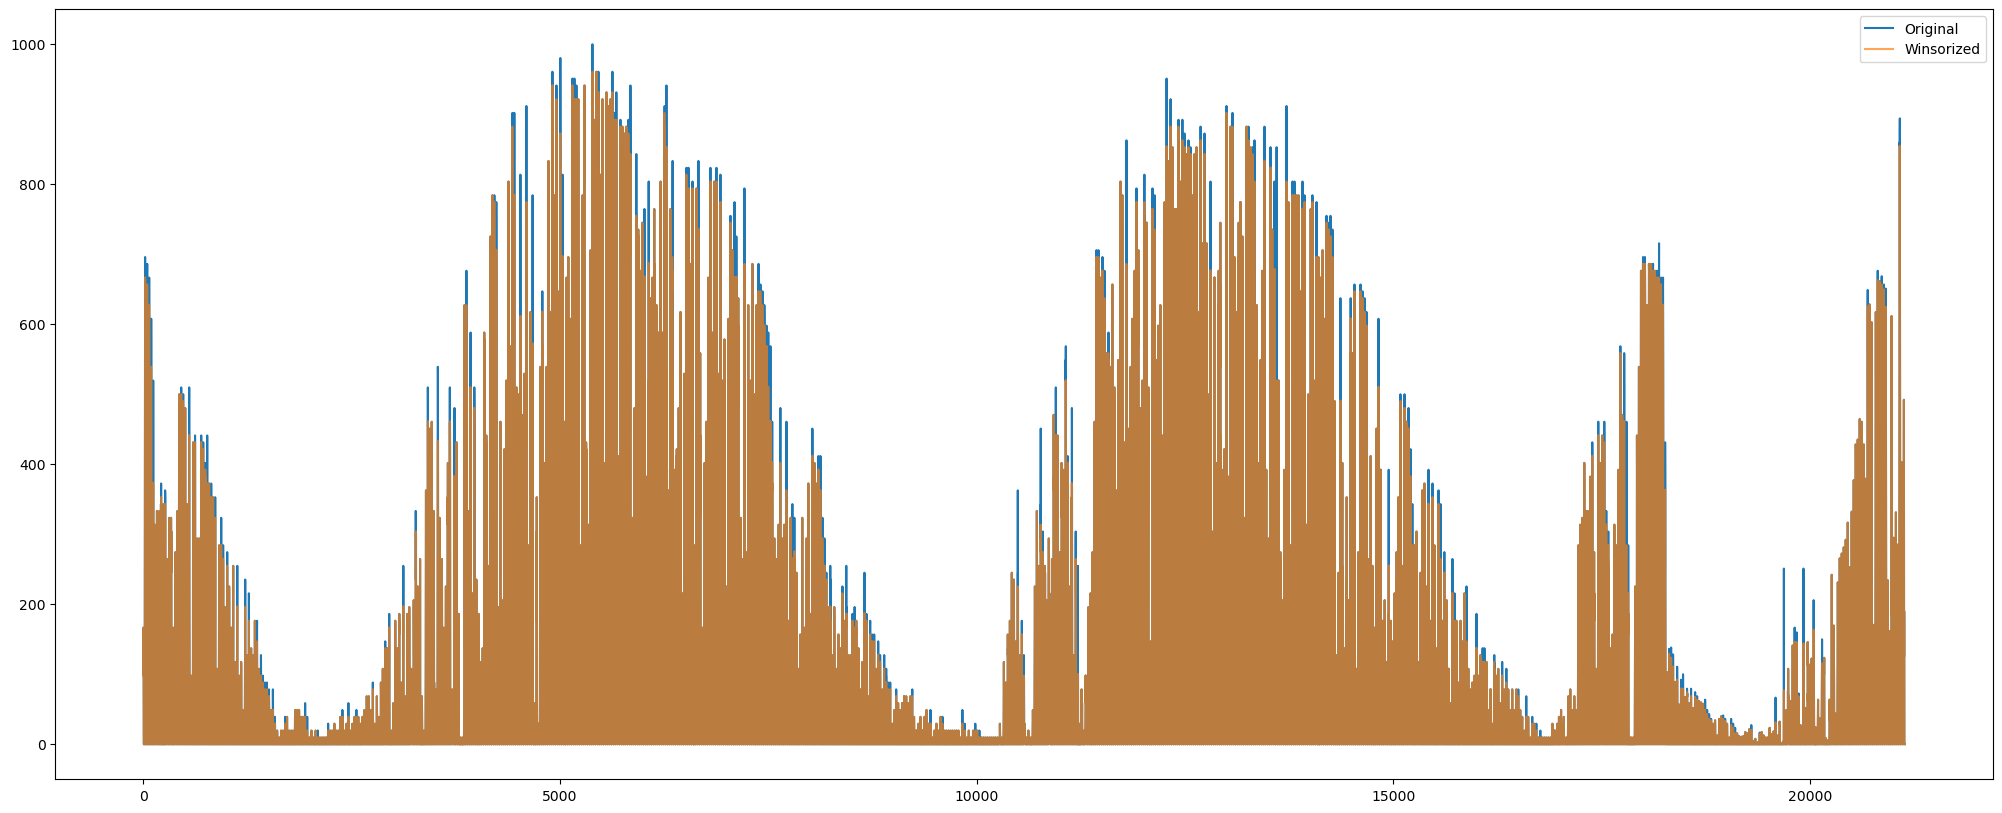

In [97]:


# Your specified window_size
window_size = 100

# Winsorize DataFrame 'C'
C = C.reset_index(drop=True)  # Reset index for DataFrame 'C'

# Define a function to apply local Winsorizing
def local_winsorize(window):
    lower_bound = window.quantile(0.05)
    upper_bound = window.quantile(0.98)
    return window.clip(lower=lower_bound, upper=upper_bound)

# Create a new column for winsorized measurements in DataFrame 'C'
C['winsorized_measurement'] = C['pv_measurement']

# Apply the function over a rolling window and update the values in the new column for DataFrame 'C'
for start in range(len(C)):
    end = start + window_size
    if end > len(C):
        break
    C.iloc[start:end, C.columns.get_loc('winsorized_measurement')] = local_winsorize(C['pv_measurement'].iloc[start:end]).values

# Plot the results for DataFrame 'C'
plt.figure(figsize=(25, 10))
plt.plot(C['pv_measurement'], label='Original')
plt.plot(C['winsorized_measurement'], label='Winsorized', alpha=0.7)
plt.legend()
plt.show()
